In [42]:
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
import plots as pl
import metrics as met

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Calculate the mean of each column
mean_values = df.mean()

# Print the mean values
print(mean_values)
df

A    2.0
B    5.0
C    8.0
dtype: float64


,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [44]:
def load_dataset(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns].values, df[target_column].values
    return X, y.reshape(-1, 1)

In [45]:
class LogisticRegression:
    def __init__(self, standardize=True, 
                 learning_rate=0.01, 
                 max_iter=1000,
                 tol=1e-4,
                 verbose=False):
        self.standardize = standardize
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def normalize(self, X):
        mean = X.mean()
        std = X.std()
        X_new = (X - mean) / std
        return X_new, mean, std

    def sigmoid(self, z):
        h = 1 / (1 + np.power(np.e, -z))
        return h
    
    def hypothesis(self, X, theta):
        z = np.dot(X, theta)
        return self.sigmoid(z)

    def cost_function(self, X, y, theta):
        m = X.shape[0]
        h = self.hypothesis(X, theta)
        cost = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
        return cost

    def gradient(self, X, y, theta):
        """Gradient of cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            array: Gradient of cost function."""
        m = X.shape[0]
        grad = 1.0 / m * np.sum((self.hypothesis(X, theta) - y) * X)
        return grad

    def gradient_descent(self, X, y, theta):
        costs = []
        J = self.cost_function(X, y, theta)
        costs.append(J)

        if self.verbose:
            print(f"Iteration 0 Cost: {J}")

        for i in range(1, self.max_iter + 1):
            grad = self.gradient(X, y, theta)
            theta = theta - self.learning_rate * grad
            cost = self.cost_function(X, y, theta)
            
            costs.append(cost)

            if i % 100 == 0 and self.verbose:
                print(f"Iteration {i} Cost: {cost}")

            if np.abs(costs[i] - costs[i - 1]) < self.tol:
                print(f"Converged at iteration {i}")
                break

        return theta, costs
    
    def fit(self, X, y):
        X_new = X.copy()
        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X_new)

        self.theta = np.zeros((X_new.shape[1], 1))
        self.theta, self.costs = self.gradient_descent(X_new, y, self.theta)

    def predict(self, X):
        X_new = X.copy()
        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X_new)

        y_pred = np.where(self.hypothesis(X_new, self.theta) > 0.5, 1, 0)
        return y_pred

    def predict_proba(self, X):
        """Predict the probability of target.
        
        Args:
            X (array): Data.
        
        Returns:
            array: Predicted probability of target."""
        X_new = X.copy()
        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X_new)

        h = self.hypothesis(X_new, self.theta)
        return h

In [46]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.8)
y = y.reshape(-1, 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)

In [49]:
lr.fit(X_train, y_train)

Iteration 0 Cost: 0.6931471805599454
Iteration 100 Cost: 0.6249395115674505
Iteration 200 Cost: 0.6013660292128377
Converged at iteration 238


In [50]:
y_test_pred = lr.predict(X_test)

Accuracy: 
0.7
Report: 
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.64      0.78      0.70        18

    accuracy                           0.70        40
   macro avg       0.71      0.71      0.70        40
weighted avg       0.71      0.70      0.70        40

Confusion: 
    0   1
0  14   8
1   4  14


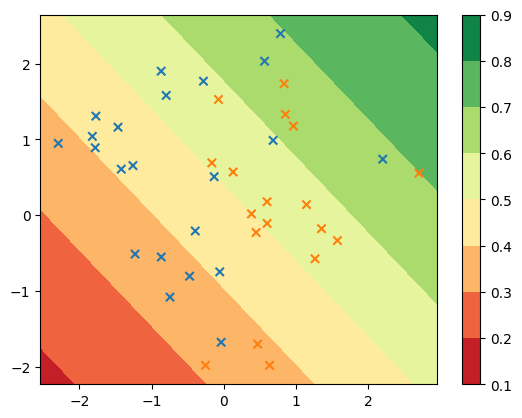

In [51]:
accuracy, report, confusion = met.evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
pl.plot_decision_boundary(lr, X_test, y_test)
plt.show()

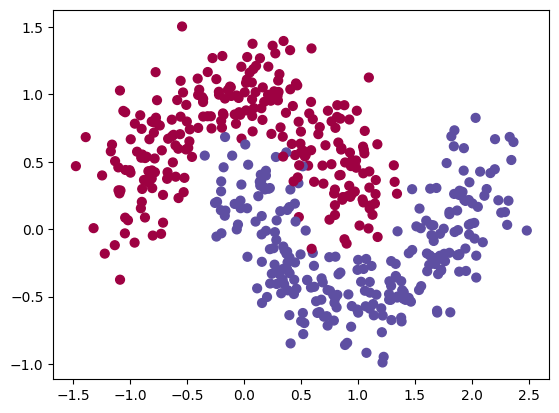

In [52]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)
pl.plot_data(X, y)

Iteration 0 Cost: 0.6931471805599452
Converged at iteration 1
Accuracy: 
0.43
Report: 
              precision    recall  f1-score   support

           0       0.36      0.42      0.39        43
           1       0.50      0.44      0.47        57

    accuracy                           0.43       100
   macro avg       0.43      0.43      0.43       100
weighted avg       0.44      0.43      0.43       100

Confusion: 
    0   1
0  18  25
1  32  25


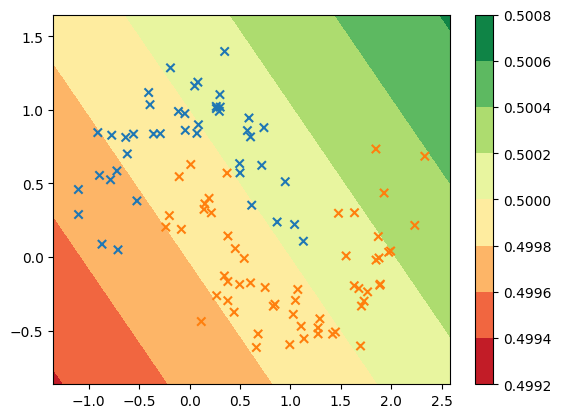

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = met.evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
pl.plot_decision_boundary(lr, X_test, y_test)
plt.show()

Evaluate the above LogisticRegression class on datasets sats.csv and tests.csv. Consider using polynomial features when applicable.

In [55]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_dataset('/home/oleksii/Projects/machine_learning_lnu/HomeWork2/sats.csv', data_columns, target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80, 1) (20, 1)


Iteration 0 Cost: 0.6931471805599454
Iteration 100 Cost: 0.5053637613245121
Iteration 200 Cost: 0.4228247735942561
Iteration 300 Cost: 0.37884071656320273
Iteration 400 Cost: 0.3519963499716332
Iteration 500 Cost: 0.33407717893652206
Iteration 600 Cost: 0.3213542412368742
Converged at iteration 629
Accuracy: 
0.8
Report: 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion: 
   0  1
0  7  1
1  3  9


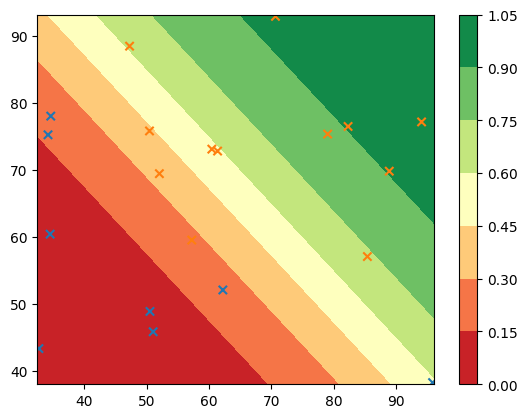

In [56]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = met.evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
pl.plot_decision_boundary(lr, X_test, y_test)
plt.show()